<a href="https://colab.research.google.com/github/lucas-azdias/Scripts-Universidade/blob/main/Python/Aprendizagem%20de%20M%C3%A1quina/06/Avalia%C3%A7%C3%A3o%20Formativa/Avalia%C3%A7%C3%A3o%20Formativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Evitar notação científica
import numpy as np

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: f'{x:.2f}'})

#Definição do Problema:

Uma vinícola possui uma base de dados detalhada sobre suas diversas variedades de vinho, com informações químicas como acidez, teor alcoólico, pH, e concentração de açúcares. O objetivo do exercício é aplicar técnicas de machine learning para desenvolver um algoritmo capaz de classificar os vinhos com base nessas características. O modelo deverá identificar padrões nos dados e categorizar os vinhos em diferentes classes de qualidade ou tipos.

Além de construir o pipeline, forneça uma comparação de performance dentre vários algoritmos

Antes de Tudo, vamos lembrar o pipeline de uma solução de aprendizagem de Máquina

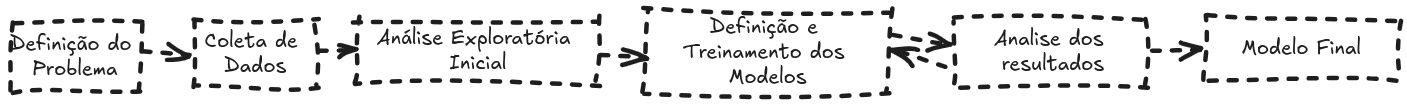

# Leitura dos dados

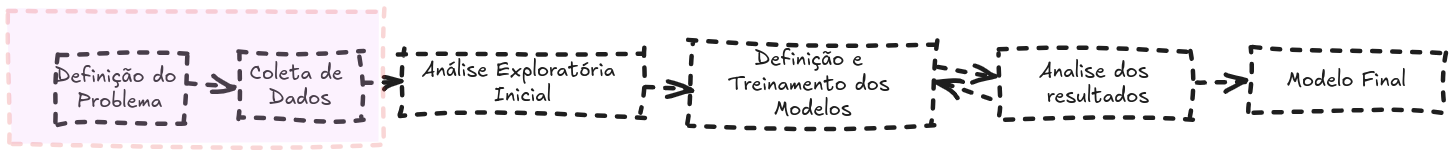

In [55]:
from sklearn.datasets import load_wine
wine = load_wine()

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

#Shuffle
df = df.sample(frac=1).reset_index(drop=True)
df.head(20)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095.0,0
1,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2
2,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0,1
3,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0,1
4,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0,2
5,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0,0
6,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
7,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2
8,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590.0,2
9,12.87,4.61,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0,2


#Exploração inicial
  Visualização da distribuição dos dados

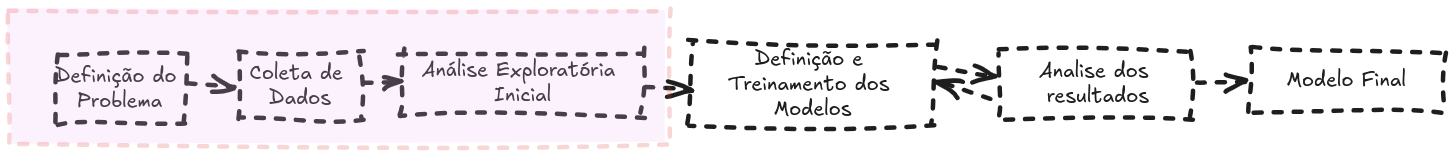

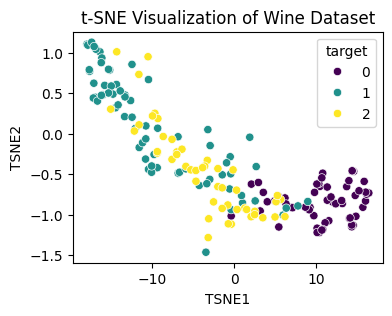

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.express as px

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(wine.data)

# Create a new DataFrame with the t-SNE coordinates
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['target'] = wine.target


# Visualize with seaborn
plt.figure(figsize=(4, 3))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='target', data=df_tsne, palette='viridis')
plt.title('t-SNE Visualization of Wine Dataset')
plt.show()

Determinar as frações de treino, validação e teste

In [58]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.2, random_state=42, stratify=wine.target)

# Dividir o conjunto de treino em treino e validação (60% treino, 20% validação)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, stratify=y_train, random_state=42
)

Observando o balanceamento dos dados

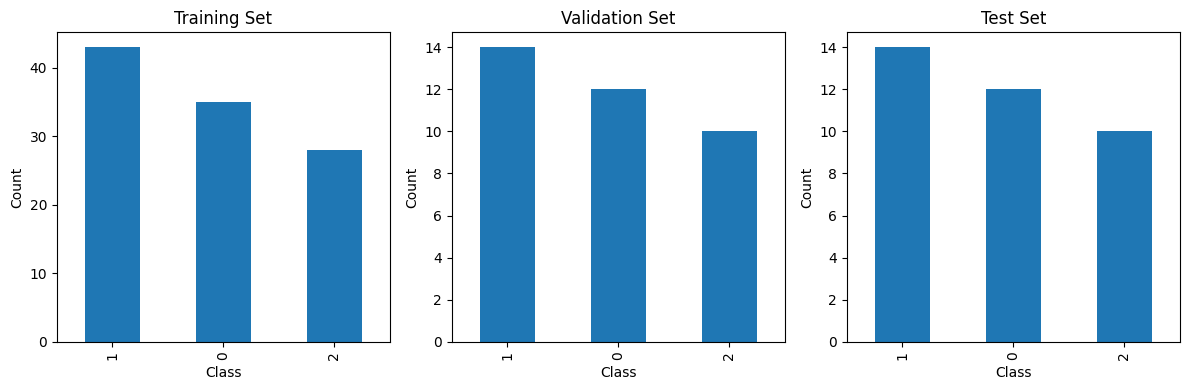

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the class distribution for each dataset
train_counts = pd.Series(y_train).value_counts()
val_counts = pd.Series(y_val).value_counts()
test_counts = pd.Series(y_test).value_counts()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the class distribution for the training set
train_counts.plot(kind='bar', ax=axes[0], title='Training Set')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Plot the class distribution for the validation set
val_counts.plot(kind='bar', ax=axes[1], title='Validation Set')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

# Plot the class distribution for the test set
test_counts.plot(kind='bar', ax=axes[2], title='Test Set')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Ficou bem balanceado graças ao stratify pelas classes no train-test

Também não esqueça de normalizar os dados!

In [60]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Comparação
print(X_train[0])
print(X_train_scaled[0])

[13.36 2.56 2.35 20.00 89.00 1.40 0.50 0.37 0.64 5.60 0.70 2.47 780.00]
[0.49 0.26 0.01 0.18 -0.72 -1.30 -1.52 0.14 -1.65 0.26 -1.16 -0.18 0.11]


#Treinamento e Performancedos Modelos
* Treine os Modelos SVM, Redes Neurais e Decision Tree
* Avalie em termos de acurácia e matriz de confusão

*IMPORTANTE: Utilize a base de validação para escolher o melhor modelo



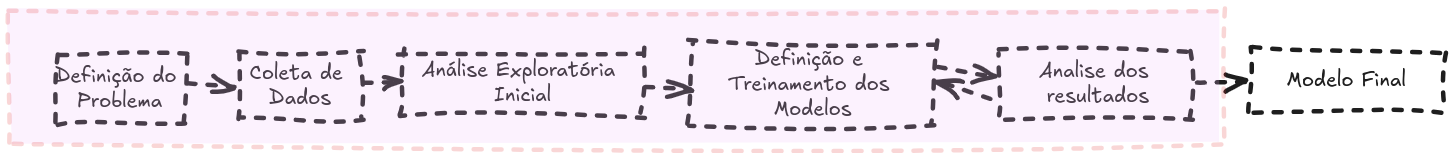

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(4, 3))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
  plt.title("Matriz de Confusão")
  plt.xlabel("Predição")
  plt.ylabel("Verdadeiro")
  plt.show()

Decision Tree:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.92      0.86      0.89        14
           2       1.00      1.00      1.00        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



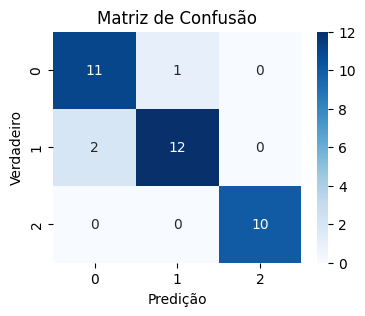


SVM:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



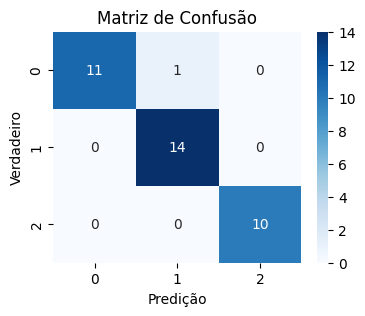


Rede Neural Artificial:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


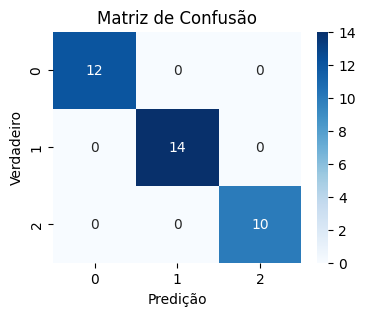

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

print("Decision Tree:")
dt_model = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model(dt_model, X_train_scaled, y_train, X_val_scaled, y_val)

print("\nSVM:")
svm_model = SVC(random_state=42)
train_and_evaluate_model(svm_model, X_train_scaled, y_train, X_val_scaled, y_val)

print("\nRede Neural Artificial:")
rna_model = MLPClassifier(random_state=42)
train_and_evaluate_model(rna_model, X_train_scaled, y_train, X_val_scaled, y_val)

##Descoberta de Parâmetros

Alguns destes modelos tem parâmetros importantes a serem avaliados:

* Redes Neurais: Número de camadas e neurônios

* SVM: Diferentes Kernels e Parâmetro C (regularização)

Assim, crie modelos com diferentes parâmetros para avaliação




SVM - Kernel Linear, C=1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



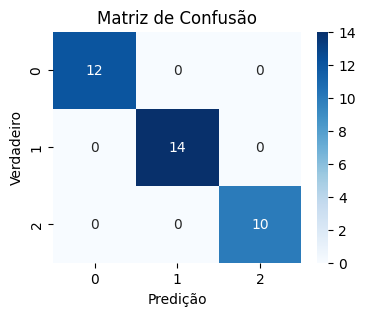


SVM - Kernel RBF, C=1:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



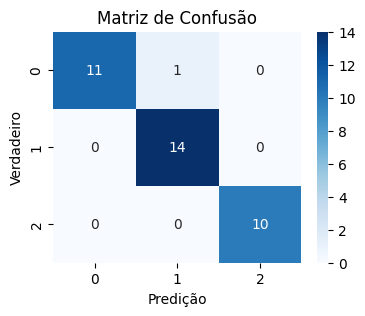


SVM - Kernel Poly, C=1:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



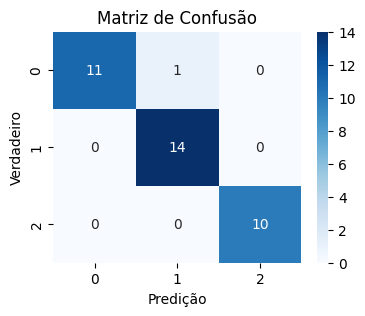


SVM - Kernel Linear, C=10:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



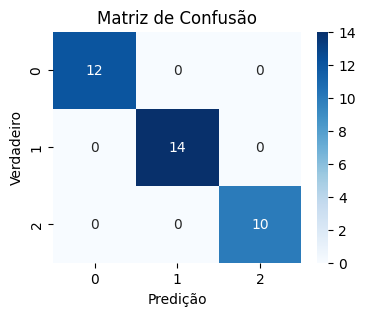


SVM - Kernel RBF, C=10:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



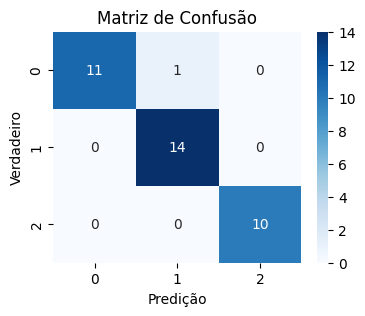


SVM - Kernel Poly, C=10:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.86      0.92        14
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



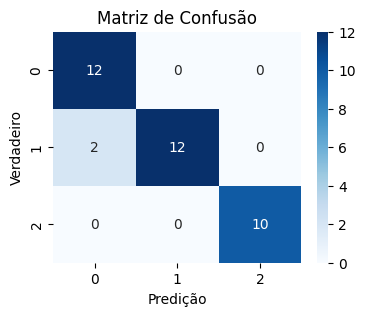

In [63]:
print("\nSVM - Kernel Linear, C=1:")
svm_model_1 = SVC(kernel='linear', C=1, random_state=42)
train_and_evaluate_model(svm_model_1, X_train_scaled, y_train, X_val_scaled, y_val)

print("\nSVM - Kernel RBF, C=1:")
svm_model_2 = SVC(kernel='rbf', C=1, random_state=42)
train_and_evaluate_model(svm_model_2, X_train_scaled, y_train, X_val_scaled, y_val)

print("\nSVM - Kernel Poly, C=1:")
svm_model_3 = SVC(kernel='poly', C=1, random_state=42)
train_and_evaluate_model(svm_model_3, X_train_scaled, y_train, X_val_scaled, y_val)

print("\nSVM - Kernel Linear, C=10:")
svm_model_4 = SVC(kernel='linear', C=10, random_state=42)
train_and_evaluate_model(svm_model_4, X_train_scaled, y_train, X_val_scaled, y_val)

print("\nSVM - Kernel RBF, C=10:")
svm_model_5 = SVC(kernel='rbf', C=10, random_state=42)
train_and_evaluate_model(svm_model_5,X_train_scaled, y_train, X_val_scaled, y_val)

print("\nSVM - Kernel Poly, C=10:")
svm_model_6 = SVC(kernel='poly', C=10, random_state=42)
train_and_evaluate_model(svm_model_6, X_train_scaled, y_train, X_val_scaled, y_val)


Rede Neural Artificial - Arquitetura 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



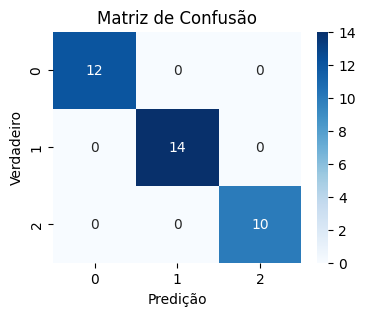


Rede Neural Artificial - Arquitetura 2:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



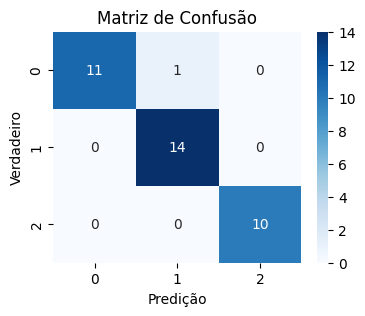


Rede Neural Artificial - Arquitetura 3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



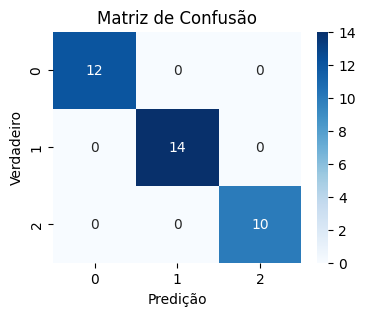


Rede Neural Artificial - Arquitetura 4:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



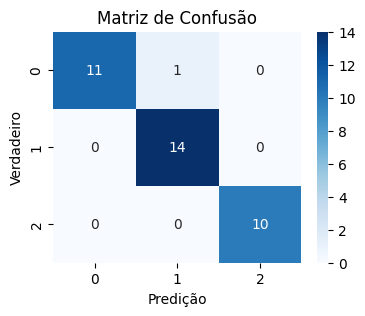


Rede Neural Artificial - Arquitetura 5:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



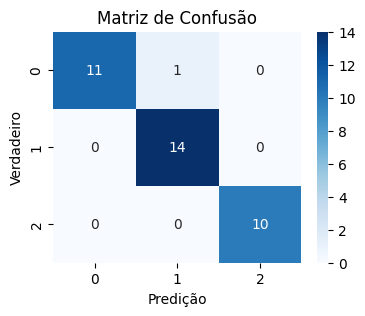

In [64]:
print("\nRede Neural Artificial - Arquitetura 1:")
rna_model_1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
train_and_evaluate_model(rna_model_1, X_train_scaled, y_train, X_val_scaled, y_val)

print("\nRede Neural Artificial - Arquitetura 2:")
rna_model_2 = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
train_and_evaluate_model(rna_model_2, X_train_scaled, y_train, X_val_scaled, y_val)

print("\nRede Neural Artificial - Arquitetura 3:")
rna_model_3 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
train_and_evaluate_model(rna_model_3, X_train_scaled, y_train, X_val_scaled, y_val)

print("\nRede Neural Artificial - Arquitetura 4:")
rna_model_4 = MLPClassifier(hidden_layer_sizes=(50, 100), max_iter=500, random_state=42)
train_and_evaluate_model(rna_model_4, X_train_scaled, y_train, X_val_scaled, y_val)

print("\nRede Neural Artificial - Arquitetura 5:")
rna_model_5 = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
train_and_evaluate_model(rna_model_5, X_train_scaled, y_train, X_val_scaled, y_val)

O que se pode inferir acerca de diferentes parametros 'C' no svm?


E com as diferentes arquiteturas de rede neural?

Faça análises sobre os resultados. Decida o melhor modelo

#Teste Final

Agora que definimos o melhor modelo, vamos avaliá-lo na base de testes.

Esse experimento simula o modelo ao ser colocado em produção, com a chegada de dados não vistos durante os ajustes. (inferência)

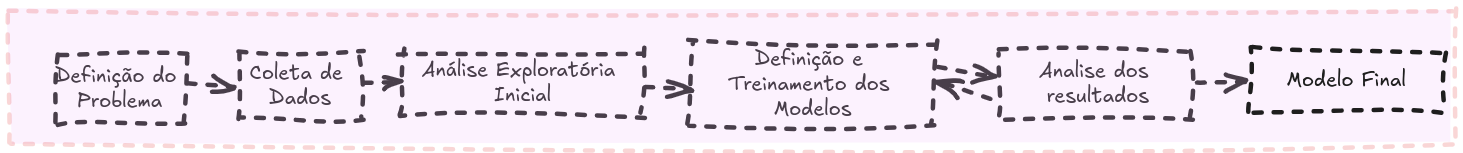

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



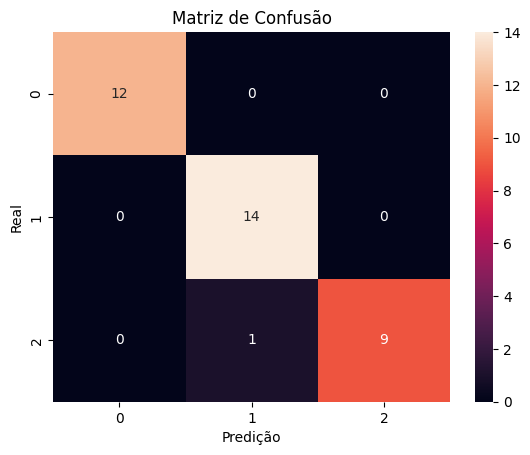

In [65]:
y_pred = rna_model_1.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()